# SVM (2 features), Optimal Search, Gaussian Naive Bayes

##### Data

Load the WDBC data below, use SVM with RBF kernel fit an RBF SVC on two features: `'radius_m'` and `'fractal_dimension_m'`. 

In [1]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

tmp = load_breast_cancer() # load dictinary of 'target' (y) and 'data' (X)  variables
wdbc = pd.DataFrame( data= np.c_[ tmp['target'], tmp['data'] ], # make pandas DataFrame
    columns= ['diagnosis', 'radius_m', 'texture_m', 'perimeter_m','area_m', 'smoothness_m', 'compactness_m', 'concavity_m',
    'concave_points_m', 'symmetry_m', 'fractal_dimension_m', 'radius_se', 'texture_se', 'perimeter_se','area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 
    'radius_w', 'texture_w','perimeter_w', 'area_w', 'smoothness_w', 'compactness_w', 'concavity_w',
    'concave_points_w','symmetry_w', 'fractal_dimension_w'])
wdbc.sample(3, random_state=123) # Randomly selects 3 rows from the wdbc DataFrame.

,diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concave_points_m,symmetry_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concave_points_w,symmetry_w,fractal_dimension_w
333,1.0,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,...,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
273,1.0,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,0.2081,...,10.75,20.88,68.09,355.2,0.1467,0.09370,0.040430,0.05159,0.2841,0.08175
201,0.0,17.540,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,0.1506,...,20.42,25.84,139.50,1239.0,0.1381,0.34200,0.350800,0.19390,0.2928,0.07867


In [2]:
X2 = wdbc[ ['radius_m', 'fractal_dimension_m'] ].to_numpy()
y = wdbc['diagnosis'].to_numpy()


## 1.1. Standardize Features 

Note that these features' scales differ by about two order of magnitude, so it is better to standardize the features before you fit the model. Use the `sklearn.preprocessing.StandardScaler` to standardize the two features. Then fit two SVC models with standard parameters ($C$ and $\gamma$) to the original and standardized features, and report the in-sample precision of each one. (Note: use all observations for this part, you do not need to split the data into train and test sets). 

In [3]:
from sklearn.preprocessing import StandardScaler; from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Unstandardized
clf_SVC = SVC(gamma='auto').fit(X2, y)
print("Unstandardized features:")
print( classification_report( y, clf_SVC.predict(X2)) )

# Standardize features
scaler = StandardScaler().fit(X2)
X2_std = scaler.transform(X2)
clf_SVC_std = SVC(gamma='auto').fit(X2_std, y)
print("Standardized features:")
print( classification_report( y, clf_SVC_std.predict(X2_std)) )

# the SVC with RBF kernel trained on the standardized data gives better performance.

Unstandardized features:
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84       212
         1.0       0.87      0.96      0.91       357

    accuracy                           0.89       569
   macro avg       0.90      0.86      0.87       569
weighted avg       0.89      0.89      0.89       569

Standardized features:
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       212
         1.0       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



## 1.2. Decision Boundary Plot
Use the `sklearn.inspection.DecisionBoundaryDisplay.from_estimator()` function to plot the decision boundary of the standardized SVC from the previous part. You can adapt the sample code below from the [function's online documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator), which applies Logistic Regression on the famous [iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

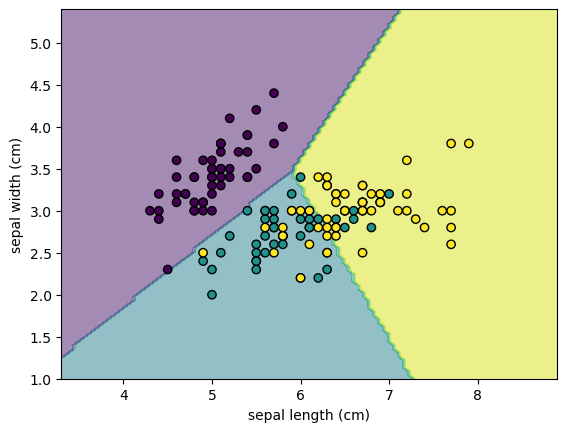

In [4]:
# iris example
## data
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data[:, :2]
y_iris = iris.target

## fit (Logistic Regression)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(X_iris, y_iris)

## Decision Boundary plot
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X_iris, response_method="predict",
    xlabel=iris.feature_names[0], 
    ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, edgecolor="k")
plt.show()


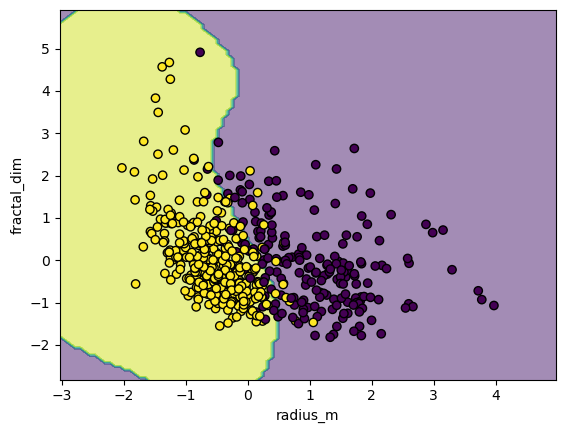

In [5]:
# WDBC (Standardized 2 features SVC RBF) example:
## Data
X2 = wdbc[ ['radius_m', 'fractal_dimension_m'] ].to_numpy()
y = wdbc['diagnosis'].to_numpy()

## Standardize features and fit SVC RBF
from sklearn.preprocessing import StandardScaler; from sklearn.svm import SVC
scaler = StandardScaler().fit(X2)
X2_std = scaler.transform(X2)
clf_SVC_std = SVC(gamma='auto').fit(X2_std, y)

## Decision Boundary plot
disp = DecisionBoundaryDisplay.from_estimator(
    clf_SVC_std, X2_std, response_method="predict",
    xlabel='radius_m', ylabel='fractal_dim',
    alpha=0.5,
)
disp.ax_.scatter(X2_std[:, 0], X2_std[:, 1], c=y, edgecolor="k")
plt.show()

## 1.3. Optimal Parameter (GridSearchCV), SVM , New Decision Boundary


In [6]:
# iris example
from sklearn.svm import SVC; from sklearn.model_selection import GridSearchCV; from sklearn.datasets import load_iris

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())
print( clf.cv_results_['mean_test_score'] )

[0.98       0.96666667 0.97333333 0.98      ]


So far we have been using the default parameters **($C$ & $\gamma$)** to fit **SVM classifiers with RBF kernel**. However, it is recommended that these are chosen by cross-validation (CV), using a grid search over possible values. Use the `sklearn.model_selection.GridSearchCV()` function to search over a $5 \times 5$ grid of values $[.01, .1, 1, 10, 100]$ for $C$ and $\gamma$ , applied to the two standardized WDBC features (radius & fractal_dimension). Adapt the sample code above, which applies SVM classification on the iris data set. Find the optimal parameter values from CV, refit the SVM classifier, and plot the new decision boundary.

In [7]:
# WDBC (Standardized 2 features SVC RBF) example:
X2 = wdbc[ ['radius_m', 'fractal_dimension_m'] ].to_numpy(); y = wdbc['diagnosis'].to_numpy()

## Standardize features
from sklearn.preprocessing import StandardScaler; from sklearn.pipeline import make_pipeline
scaler = StandardScaler().fit(X2); X2_std = scaler.transform(X2)

In [8]:
## GridSearchCV fit
from sklearn.model_selection import GridSearchCV; from sklearn.svm import SVC
parameters = {'gamma': [.01, .1, 1, 10, 100], 'C':[.01, .1, 1, 10, 100]}
svc = SVC()
clf = GridSearchCV( svc, parameters )
clf.fit( X2_std, y )
print(  clf.cv_results_["mean_test_score"] )

## Optimal Parameter from GridSearchCV
np.argmin( clf.cv_results_["mean_test_score"] ) # return the index of the smallest value
#  opt_param = clf.best_params_ 
opt_param = clf.cv_results_["params"][ np.argmax( clf.cv_results_["mean_test_score"] ) ] 

## Fit SVC with Optimal Parameter (gamma, C)
clf_SVC_std_RBF = SVC( gamma = opt_param["gamma"], C=opt_param["C"],probability=True).fit(X2_std, y)


[0.6274181  0.6274181  0.6274181  0.6274181  0.6274181  0.66258345
 0.8682658  0.8927651  0.84019562 0.6274181  0.87002018 0.89456606
 0.88400869 0.88220773 0.79259432 0.89807483 0.88753299 0.88927185
 0.85586089 0.77675827 0.90509238 0.8893029  0.88576308 0.83120633
 0.75913678]


In [9]:
clf_SVC_std_RBF

SVC(C=100, gamma=0.01, probability=True)

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       212
         1.0       0.91      0.94      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



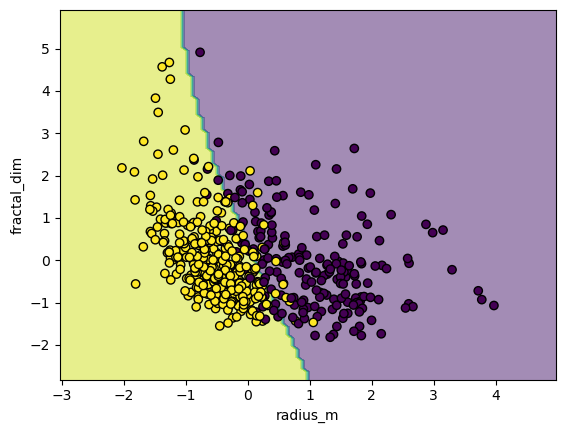

In [10]:
## Evaluation with classification report
from sklearn.metrics import classification_report
print( classification_report( y, clf_SVC_std_RBF.predict(X2_std)) )

## Plot Decision Boundary
disp = DecisionBoundaryDisplay.from_estimator(
    clf_SVC_std_RBF, X2_std, response_method="predict",
    xlabel='radius_m', ylabel='fractal_dim',
    alpha=0.5,
)
disp.ax_.scatter(X2_std[:, 0], X2_std[:, 1], c=y, edgecolor="k")
plt.show()

## 2. Others

In [11]:
X2 = wdbc[ ['radius_m', 'fractal_dimension_m'] ].to_numpy()
y = wdbc['diagnosis'].to_numpy()
## Standardize features
from sklearn.preprocessing import StandardScaler; from sklearn.pipeline import make_pipeline
scaler = StandardScaler().fit(X2)
X2_std = scaler.transform(X2)

### 2.1 SVM with Polynomial Kernels

              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79       212
         1.0       0.83      0.98      0.90       357

    accuracy                           0.86       569
   macro avg       0.90      0.82      0.84       569
weighted avg       0.88      0.86      0.86       569



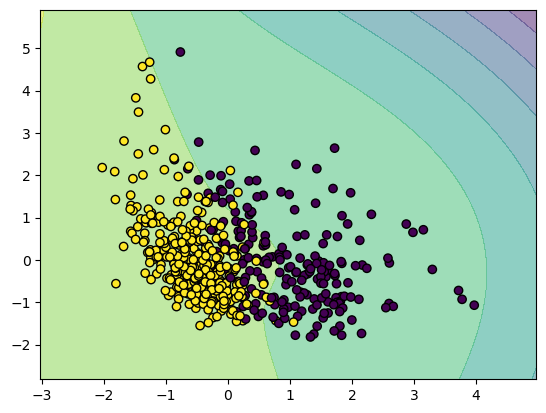

In [12]:
from sklearn.svm import SVC
X=X2_std; svc_poly = SVC(kernel='poly', degree = 3, probability=True).fit(X,y)

print( classification_report( y, svc_poly.predict(X) ) )

DecisionBoundaryDisplay.from_estimator( svc_poly, X, alpha=0.5 )
plt.scatter(X[:, 0], X[:, 1], c=y , edgecolor="black")

### 2.2. Gaussian Naive Bayes

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82       212
         1.0       0.86      0.97      0.91       357

    accuracy                           0.88       569
   macro avg       0.90      0.85      0.87       569
weighted avg       0.89      0.88      0.88       569



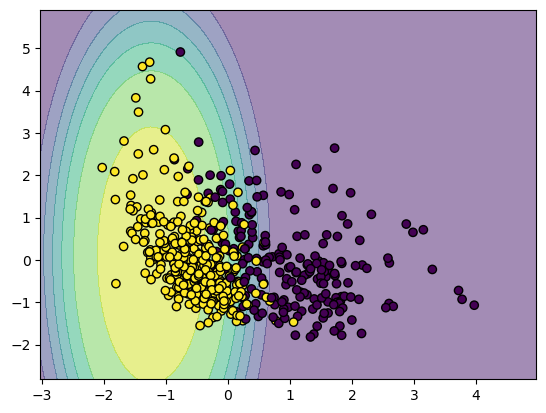

In [13]:
from sklearn.naive_bayes import GaussianNB
X=X2_std; nb = GaussianNB().fit(X, y)

from sklearn.metrics import classification_report
print( classification_report( y, nb.predict(X) ) )

# Display decision boundary
DecisionBoundaryDisplay.from_estimator( nb, X, alpha=0.5 )
plt.scatter(X[:, 0], X[:, 1], c=y , edgecolor="black")

### 2.3. ROC_AUC Plots

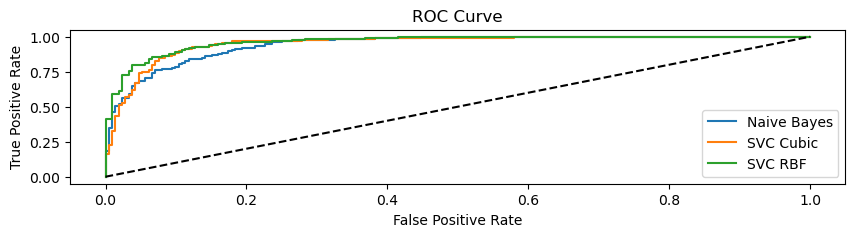

In [14]:
from sklearn.metrics import roc_curve
fpr_nb, tpr_nb, _ = roc_curve(y, nb.predict_proba(X)[:,1] )
fpr_svc_poly, tpr_svc_poly, _ = roc_curve(y, svc_poly.predict_proba(X)[:,1] )
fpr_clf_SVC_std_RBF, tpr_clf_SVC_std_RBF, _ = roc_curve(y, clf_SVC_std_RBF.predict_proba(X)[:,1] )

# Plot ROC curves
plt.figure(figsize=(10, 2))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes')
plt.plot(fpr_svc_poly, tpr_svc_poly, label=f'SVC Cubic')
plt.plot(fpr_clf_SVC_std_RBF, tpr_clf_SVC_std_RBF, label=f'SVC RBF')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate');plt.title('ROC Curve');plt.legend(loc='best');plt.show()